In [1]:
import numpy as np 
import pandas as pd 
import os
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
os.environ["KMP_WARNINGS"] = "FALSE"

In [6]:
from sqlalchemy import create_engine
from config import db_password, end
db_string = f"postgresql://postgres:{db_password}@{end}:5432/postgres"

engine = create_engine(db_string)

connection = engine

In [7]:
pd.read_sql("SELECT * FROM sports", connection)

,filepaths,labels,data_set
0,train/air hockey/001.jpg,air hockey,train
1,train/air hockey/002.jpg,air hockey,train
2,train/air hockey/003.jpg,air hockey,train
3,train/air hockey/004.jpg,air hockey,train
4,train/air hockey/005.jpg,air hockey,train
...,...,...,...
14567,valid/wingsuit flying/1.jpg,wingsuit flying,valid
14568,valid/wingsuit flying/2.jpg,wingsuit flying,valid
14569,valid/wingsuit flying/3.jpg,wingsuit flying,valid
14570,valid/wingsuit flying/4.jpg,wingsuit flying,valid


In [8]:
# Set Parameters
num_classes = 100
batch_size = 64
img_height = 224
img_width = 224

In [9]:
# Keras data loader
# training, validation and test set
TRAIN_PATH = pathlib.Path("train")
VAL_PATH = pathlib.Path("valid")
TEST_PATH = pathlib.Path("test")

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_PATH,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1217 files belonging to 10 classes.
Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


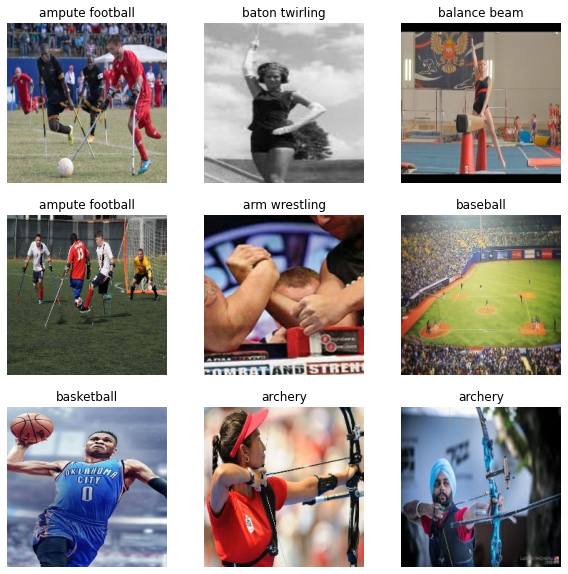

In [17]:
# Show images from train 
class_names = train_ds.class_names
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [15]:
model1 = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

In [16]:
# setting hyperparameters
model1.compile(optimizer='adam', # set the optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function
    metrics=['accuracy']) #accuracy metric

history = model1.fit(train_ds,epochs=4, steps_per_epoch=5)
print("PERFOMANCE",model1.evaluate(test_ds))

model1.summary()

Epoch 1/4
5/5 [==============================] - 23s 4s/step - loss: 5.5853 - accuracy: 0.0656
Epoch 2/4
5/5 [==============================] - 24s 5s/step - loss: 4.4311 - accuracy: 0.0906
Epoch 3/4
5/5 [==============================] - 24s 5s/step - loss: 3.5968 - accuracy: 0.1187
Epoch 4/4
8/8 [==============================] - 9s 1s/step - loss: 6.4658 - accuracy: 0.0100
PERFOMANCE [6.465803146362305, 0.009999999776482582]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                  